In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv("/content/cleanedPhoneData.csv")

In [33]:
df.head(10)

,name,brand,price (đ),link_item,link_img,resolution,size,rate,quantity_sale,original price (đ),discount percent
0,Điện thoại Samsung Galaxy S25 5G 12GB/256GB,Samsung,19990000,https://www.thegioididong.com/dtdd/samsung-gal...,https://cdn.tgdd.vn/Products/Images/42/333363/...,Full HD+,6.20,0.0,0.0,22990000,13
1,Điện thoại Samsung Galaxy S25 Ultra 5G 12GB/256GB,Samsung,30990000,https://www.thegioididong.com/dtdd/samsung-gal...,https://cdn.tgdd.vn/Products/Images/42/333347/...,Quad HD+ (2K+),6.90,0.0,0.0,33990000,8
2,Điện thoại iPhone 16 Pro Max 256GB,iPhone (Apple),32890000,https://www.thegioididong.com/dtdd/iphone-16-p...,https://cdn.tgdd.vn/Products/Images/42/329149/...,Super Retina XDR,6.90,4.9,94500.0,34990000,6
3,Điện thoại iPhone 16 Pro 128GB,iPhone (Apple),27590000,https://www.thegioididong.com/dtdd/iphone-16-pro,https://cdn.tgdd.vn/Products/Images/42/329143/...,Super Retina XDR,6.30,4.9,10400.0,28990000,4
4,Điện thoại Samsung Galaxy S24 Ultra 5G 12GB/256GB,Samsung,25990000,https://www.thegioididong.com/dtdd/samsung-gal...,https://cdn.tgdd.vn/Products/Images/42/307174/...,Quad HD+ (2K+),6.80,4.9,24200.0,29990000,13
5,Điện thoại Samsung Galaxy A16 8GB/128GB,Samsung,5390000,https://www.thegioididong.com/dtdd/samsung-gal...,https://cdn.tgdd.vn/Products/Images/42/331207/...,Full HD+,6.70,4.9,43000.0,5890000,8
6,Điện thoại Xiaomi Redmi Note 14 8GB/128GB,Xiaomi,5490000,https://www.thegioididong.com/dtdd/xiaomi-redm...,https://cdn.tgdd.vn/Products/Images/42/333147/...,Full HD+,6.67,4.9,24100.0,0,0
7,Điện thoại Xiaomi Redmi Note 14 Pro 8GB/256GB,Xiaomi,7990000,https://www.thegioididong.com/dtdd/xiaomi-redm...,https://cdn.tgdd.vn/Products/Images/42/320730/...,Full HD+,6.67,4.9,7500.0,0,0
8,Điện thoại OPPO Reno13 F 5G 8GB/256GB,OPPO,9990000,https://www.thegioididong.com/dtdd/oppo-reno13...,https://cdn.tgdd.vn/Products/Images/42/332936/...,Full HD+,6.67,4.9,23900.0,0,0
9,Điện thoại OPPO Reno13 5G 12GB/256GB,OPPO,15990000,https://www.thegioididong.com/dtdd/oppo-reno13-5g,https://cdn.tgdd.vn/Products/Images/42/332934/...,1.5K,6.59,5.0,3300.0,0,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                110 non-null    object 
 1   brand               110 non-null    object 
 2   price (đ)           110 non-null    int64  
 3   link_item           110 non-null    object 
 4   link_img            110 non-null    object 
 5   resolution          110 non-null    object 
 6   size                108 non-null    float64
 7   rate                110 non-null    float64
 8   quantity_sale       110 non-null    float64
 9   original price (đ)  110 non-null    int64  
 10  discount percent    110 non-null    int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 9.6+ KB


In [35]:
df.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
price (đ),110.0,9797272.73,9582385.21,380000.00,2815000.00,6990000.00,13590000.0,39990000.00
size,108.0,5.91,1.71,1.77,6.28,6.67,6.7,7.92
rate,110.0,4.78,0.80,0.00,4.90,4.90,4.9,5.00
quantity_sale,110.0,36824.51,53838.59,0.00,3475.00,14650.00,44250.0,259700.00
original price (đ),110.0,5485727.27,9884347.41,0.00,0.00,0.00,7465000.0,43990000.00
discount percent,110.0,4.33,7.55,0.00,0.00,0.00,6.0,33.00


In [36]:
from sklearn.preprocessing import LabelEncoder

# Tạo bộ mã hóa
label_encoder_brand = LabelEncoder()
label_encoder_resolution = LabelEncoder()

# Áp dụng cho cột "brand" và "rom_type"
df["brand_encoded"] = label_encoder_brand.fit_transform(df["brand"])
df["resolution_encoded"] = label_encoder_resolution.fit_transform(df["resolution"])

# Kiểm tra kết quả
# In danh sách thương hiệu đã được mã hóa
unique_brands = list(label_encoder_brand.classes_)
print(f"Tổng số thương hiệu: {len(unique_brands)}")
print("Danh sách thương hiệu và mã hóa:")
for i, brand in enumerate(unique_brands):
    print(f"{i}: {brand}")

Tổng số thương hiệu: 15
Danh sách thương hiệu và mã hóa:
0: Benco
1: HONOR
2: Itel
3: Masstel
4: Mobell
5: Nokia
6: OPPO
7: Samsung
8: TCL
9: Tecno
10: Viettel
11: Xiaomi
12: iPhone (Apple)
13: realme
14: vivo


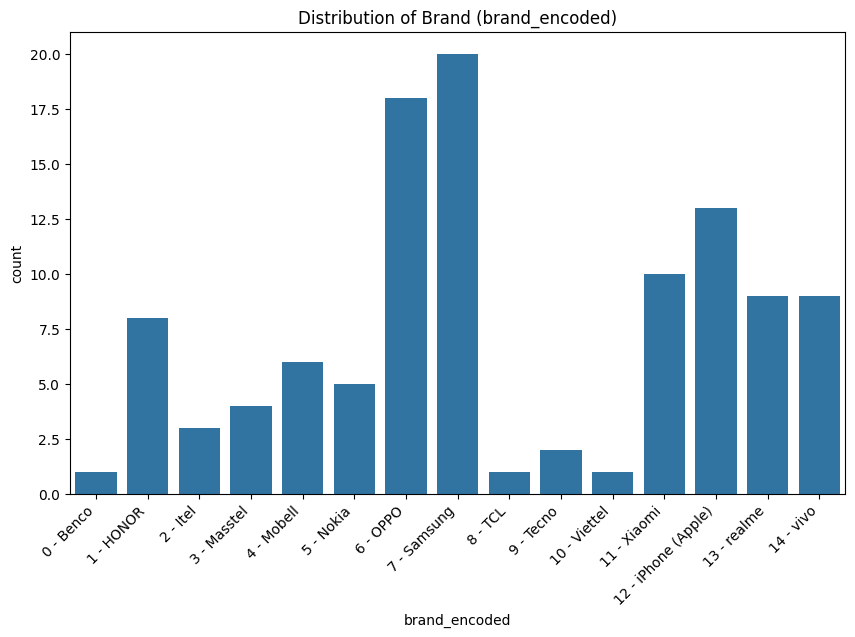

Brand 0 (Benco): 1 sản phẩm
Brand 1 (HONOR): 8 sản phẩm
Brand 2 (Itel): 3 sản phẩm
Brand 3 (Masstel): 4 sản phẩm
Brand 4 (Mobell): 6 sản phẩm
Brand 5 (Nokia): 5 sản phẩm
Brand 6 (OPPO): 18 sản phẩm
Brand 7 (Samsung): 20 sản phẩm
Brand 8 (TCL): 1 sản phẩm
Brand 9 (Tecno): 2 sản phẩm
Brand 10 (Viettel): 1 sản phẩm
Brand 11 (Xiaomi): 10 sản phẩm
Brand 12 (iPhone (Apple)): 13 sản phẩm
Brand 13 (realme): 9 sản phẩm
Brand 14 (vivo): 9 sản phẩm


In [37]:
# Vẽ biểu đồ cột với brand_encoded
plt.figure(figsize=(10, 6))
sns.countplot(x="brand_encoded", data=df)

plt.title("Distribution of Brand (brand_encoded)")
# Tạo nhãn trục x có cả số brand_encoded và tên thương hiệu
brand_codes = sorted(df["brand_encoded"].unique())
brand_labels = label_encoder_brand.inverse_transform(brand_codes)
combined_labels = [f"{code} - {brand}" for code, brand in zip(brand_codes, brand_labels)]

# Cập nhật nhãn trục x
plt.xticks(ticks=brand_codes, labels=combined_labels, rotation=45, ha="right")

# Hiển thị biểu đồ
plt.show()

brand_counts = df["brand_encoded"].value_counts().sort_index()
for brand_code, count in brand_counts.items():
    print(f"Brand {brand_code} ({label_encoder_brand.inverse_transform([brand_code])[0]}): {count} sản phẩm")

In [38]:
# In danh sách loại ROM đã được mã hóa
unique_resolutions = list(label_encoder_resolution.classes_)
print(f"Tổng số loại relu: {len(unique_resolutions)}")
print("Danh sách loại relu và mã hóa:")
for i, resolution in enumerate(unique_resolutions):
    print(f"{i}: {resolution}")


Tổng số loại relu: 12
Danh sách loại relu và mã hóa:
0: 1.5K
1: 1.5K+
2: Full HD+
3: HD+
4: Liquid Retina
5: No resolution
6: QQVGA
7: QVGA
8: QXGA+
9: Quad HD (2K)
10: Quad HD+ (2K+)
11: Super Retina XDR


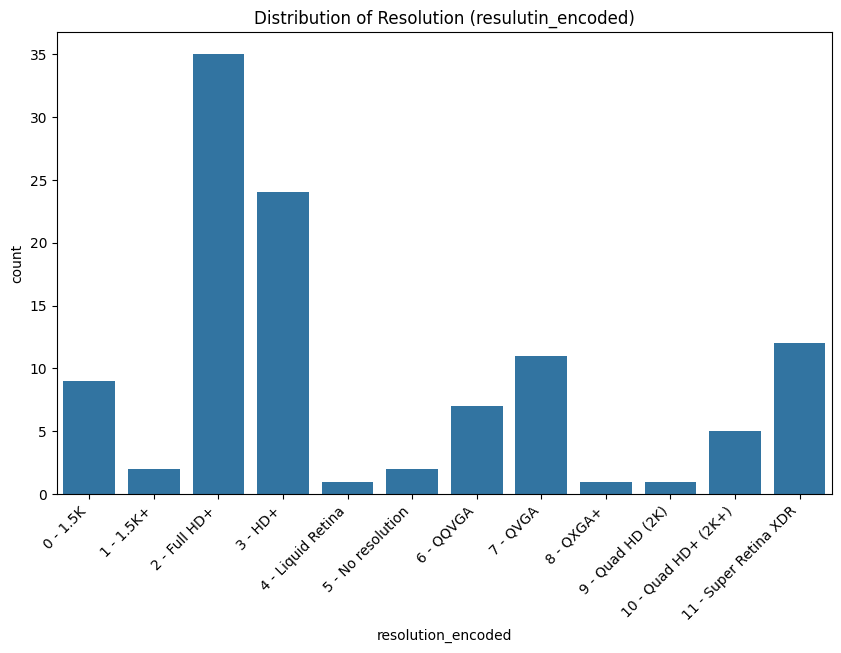

Resolution type 0 (1.5K): 9 sản phẩm
Resolution type 1 (1.5K+): 2 sản phẩm
Resolution type 2 (Full HD+): 35 sản phẩm
Resolution type 3 (HD+): 24 sản phẩm
Resolution type 4 (Liquid Retina): 1 sản phẩm
Resolution type 5 (No resolution): 2 sản phẩm
Resolution type 6 (QQVGA): 7 sản phẩm
Resolution type 7 (QVGA): 11 sản phẩm
Resolution type 8 (QXGA+): 1 sản phẩm
Resolution type 9 (Quad HD (2K)): 1 sản phẩm
Resolution type 10 (Quad HD+ (2K+)): 5 sản phẩm
Resolution type 11 (Super Retina XDR): 12 sản phẩm


In [39]:
#Vẽ biểu đồ cột với rom_type_encoded
plt.figure(figsize=(10, 6))
sns.countplot(x="resolution_encoded", data=df)

plt.title("Distribution of Resolution (resulutin_encoded)")
# Tạo nhãn trục x có cả số rom_type_encoded và tên thương hiệu
relu_codes = sorted(df["resolution_encoded"].unique())
relu_labels = label_encoder_resolution.inverse_transform(relu_codes)
combined_labels = [f"{code} - {relu}" for code, relu in zip(relu_codes, relu_labels)]

# Cập nhật nhãn trục x
plt.xticks(ticks=relu_codes, labels=combined_labels, rotation=45, ha="right")

# Hiển thị biểu đồ
plt.show()



rom_counts = df["resolution_encoded"].value_counts().sort_index()
for rom_code, count in rom_counts.items():
    print(f"Resolution type {rom_code} ({label_encoder_resolution.inverse_transform([rom_code])[0]}): {count} sản phẩm")

In [40]:
df.drop(['brand', 'resolution'], axis=1, inplace=True)

In [41]:
df.head(10)

,name,price (đ),link_item,link_img,size,rate,quantity_sale,original price (đ),discount percent,brand_encoded,resolution_encoded
0,Điện thoại Samsung Galaxy S25 5G 12GB/256GB,19990000,https://www.thegioididong.com/dtdd/samsung-gal...,https://cdn.tgdd.vn/Products/Images/42/333363/...,6.20,0.0,0.0,22990000,13,7,2
1,Điện thoại Samsung Galaxy S25 Ultra 5G 12GB/256GB,30990000,https://www.thegioididong.com/dtdd/samsung-gal...,https://cdn.tgdd.vn/Products/Images/42/333347/...,6.90,0.0,0.0,33990000,8,7,10
2,Điện thoại iPhone 16 Pro Max 256GB,32890000,https://www.thegioididong.com/dtdd/iphone-16-p...,https://cdn.tgdd.vn/Products/Images/42/329149/...,6.90,4.9,94500.0,34990000,6,12,11
3,Điện thoại iPhone 16 Pro 128GB,27590000,https://www.thegioididong.com/dtdd/iphone-16-pro,https://cdn.tgdd.vn/Products/Images/42/329143/...,6.30,4.9,10400.0,28990000,4,12,11
4,Điện thoại Samsung Galaxy S24 Ultra 5G 12GB/256GB,25990000,https://www.thegioididong.com/dtdd/samsung-gal...,https://cdn.tgdd.vn/Products/Images/42/307174/...,6.80,4.9,24200.0,29990000,13,7,10
5,Điện thoại Samsung Galaxy A16 8GB/128GB,5390000,https://www.thegioididong.com/dtdd/samsung-gal...,https://cdn.tgdd.vn/Products/Images/42/331207/...,6.70,4.9,43000.0,5890000,8,7,2
6,Điện thoại Xiaomi Redmi Note 14 8GB/128GB,5490000,https://www.thegioididong.com/dtdd/xiaomi-redm...,https://cdn.tgdd.vn/Products/Images/42/333147/...,6.67,4.9,24100.0,0,0,11,2
7,Điện thoại Xiaomi Redmi Note 14 Pro 8GB/256GB,7990000,https://www.thegioididong.com/dtdd/xiaomi-redm...,https://cdn.tgdd.vn/Products/Images/42/320730/...,6.67,4.9,7500.0,0,0,11,2
8,Điện thoại OPPO Reno13 F 5G 8GB/256GB,9990000,https://www.thegioididong.com/dtdd/oppo-reno13...,https://cdn.tgdd.vn/Products/Images/42/332936/...,6.67,4.9,23900.0,0,0,6,2
9,Điện thoại OPPO Reno13 5G 12GB/256GB,15990000,https://www.thegioididong.com/dtdd/oppo-reno13-5g,https://cdn.tgdd.vn/Products/Images/42/332934/...,6.59,5.0,3300.0,0,0,6,0


In [42]:
df.head(5)

,name,price (đ),link_item,link_img,size,rate,quantity_sale,original price (đ),discount percent,brand_encoded,resolution_encoded
0,Điện thoại Samsung Galaxy S25 5G 12GB/256GB,19990000,https://www.thegioididong.com/dtdd/samsung-gal...,https://cdn.tgdd.vn/Products/Images/42/333363/...,6.2,0.0,0.0,22990000,13,7,2
1,Điện thoại Samsung Galaxy S25 Ultra 5G 12GB/256GB,30990000,https://www.thegioididong.com/dtdd/samsung-gal...,https://cdn.tgdd.vn/Products/Images/42/333347/...,6.9,0.0,0.0,33990000,8,7,10
2,Điện thoại iPhone 16 Pro Max 256GB,32890000,https://www.thegioididong.com/dtdd/iphone-16-p...,https://cdn.tgdd.vn/Products/Images/42/329149/...,6.9,4.9,94500.0,34990000,6,12,11
3,Điện thoại iPhone 16 Pro 128GB,27590000,https://www.thegioididong.com/dtdd/iphone-16-pro,https://cdn.tgdd.vn/Products/Images/42/329143/...,6.3,4.9,10400.0,28990000,4,12,11
4,Điện thoại Samsung Galaxy S24 Ultra 5G 12GB/256GB,25990000,https://www.thegioididong.com/dtdd/samsung-gal...,https://cdn.tgdd.vn/Products/Images/42/307174/...,6.8,4.9,24200.0,29990000,13,7,10


In [43]:
variance = np.var(df["quantity_sale"], ddof=1)  # Phương sai (variance)
std_dev = np.std(df["quantity_sale"], ddof=1)  # Độ lệch chuẩn (standard deviation)
data_range = np.max(df["quantity_sale"]) - np.min(df["quantity_sale"])  # Phạm vi (range)
iqr = np.percentile(df["quantity_sale"], 75) - np.percentile(df["quantity_sale"], 25)  # Khoảng tứ (IQR)
# Tính các giá trị thống kê của quantity_sale
statistics = {
    "Mean": np.mean(df["quantity_sale"]),
    "Weighted Mean (Weight = quantity_sale)": np.average(df["quantity_sale"], weights=df["quantity_sale"]),
    "Median (50th Percentile)": np.median(df["quantity_sale"]),
    "25th Percentile": np.percentile(df["quantity_sale"], 25),
    "75th Percentile": np.percentile(df["quantity_sale"], 75),
    "Min": np.min(df["quantity_sale"]),
    "Max": np.max(df["quantity_sale"]),
    "Standard Deviation": np.std(df["quantity_sale"], ddof=1),
    "Mode": df["quantity_sale"].mode()[0],  # Lấy giá trị mode đầu tiên nếu có nhiều mode
    "Outliers (Z-score > 3)": df["quantity_sale"][np.abs((df["quantity_sale"] - np.mean(df["quantity_sale"])) / np.std(df["quantity_sale"], ddof=1)) > 3].values,
    "Variance (Phương sai)": variance,
    "Standard Deviation (Độ lệch chuẩn)": std_dev,
    "Range (Phạm vi)": data_range,
    "IQR (Khoảng Tứ)": iqr,
}

# Hiển thị kết quả

statistics_df = pd.DataFrame(list(statistics.items()), columns=["Statistic", "Value"])
statistics_df

,Statistic,Value
0,Mean,36824.509091
1,Weighted Mean (Weight = quantity_sale),114822.652004
2,Median (50th Percentile),14650.0
3,25th Percentile,3475.0
4,75th Percentile,44250.0
5,Min,0.0
6,Max,259700.0
7,Standard Deviation,53838.593768
8,Mode,0.0
9,Outliers (Z-score > 3),"[240200.0, 259700.0, 250000.0]"


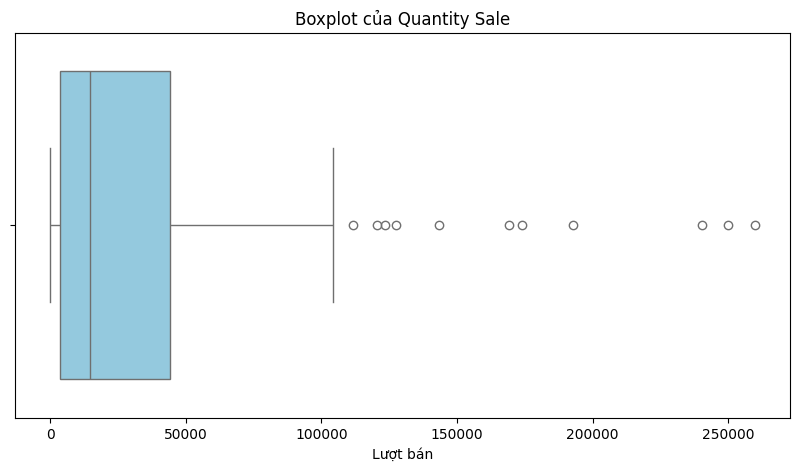

In [44]:
# Vẽ boxplot của quantity_sale
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["quantity_sale"], color="skyblue")

# Tiêu đề và nhãn trục
plt.title("Boxplot của Quantity Sale")
plt.xlabel("Lượt bán")

# Hiển thị biểu đồ
plt.show()


Có thể thấy Quantity_sale có quá nhiều outliers, tiến hành phân nhóm cho quantity_sale theo tứ phân vị

In [45]:
df["quantity_sale_group"] = pd.qcut(df["quantity_sale"], q=4, labels=["Thấp", "Trung bình", "Cao", "Rất cao"])

In [46]:
# Áp dụng Label Encoding
label_encoder_quantity = LabelEncoder()
df["quantity_sale_encoded"] = label_encoder_quantity.fit_transform(df["quantity_sale_group"])

# Kiểm tra thứ tự mã hóa
encoded_mapping = dict(zip(label_encoder_quantity.classes_, label_encoder_quantity.transform(label_encoder_quantity.classes_)))

print("Thứ tự mã hóa:")
for group, encoded_value in encoded_mapping.items():
    print(f"{group}: {encoded_value}")

Thứ tự mã hóa:
Cao: 0
Rất cao: 1
Thấp: 2
Trung bình: 3


In [47]:
# # Vẽ boxplot của quantity_sale
# plt.figure(figsize=(10, 5))
# sns.boxplot(x=df["price (đ)"], color="skyblue")
# plt.ticklabel_format(style='plain', axis='x')
# # Tiêu đề và nhãn trục
# plt.title("Boxplot của Price")
# plt.xlabel("Giá (đồng)")

# # Hiển thị biểu đồ
# plt.show()


In [48]:
# df["price_group"] = pd.qcut(df["price (đ)"], q=4, labels=["Thấp", "Trung bình", "Cao", "Rất cao"])

In [49]:
# # Áp dụng Label Encoding
# label_encoder_price = LabelEncoder()
# df["price_encoded"] = label_encoder_price.fit_transform(df["price_group"])

# # Kiểm tra thứ tự mã hóa
# encoded_mapping = dict(zip(label_encoder_price.classes_, label_encoder_price.transform(label_encoder_price.classes_)))

# print("Thứ tự mã hóa:")
# for group, encoded_value in encoded_mapping.items():
#     print(f"{group}: {encoded_value}")

In [50]:
df.head(10)

,name,price (đ),link_item,link_img,size,rate,quantity_sale,original price (đ),discount percent,brand_encoded,resolution_encoded,quantity_sale_group,quantity_sale_encoded
0,Điện thoại Samsung Galaxy S25 5G 12GB/256GB,19990000,https://www.thegioididong.com/dtdd/samsung-gal...,https://cdn.tgdd.vn/Products/Images/42/333363/...,6.20,0.0,0.0,22990000,13,7,2,Thấp,2
1,Điện thoại Samsung Galaxy S25 Ultra 5G 12GB/256GB,30990000,https://www.thegioididong.com/dtdd/samsung-gal...,https://cdn.tgdd.vn/Products/Images/42/333347/...,6.90,0.0,0.0,33990000,8,7,10,Thấp,2
2,Điện thoại iPhone 16 Pro Max 256GB,32890000,https://www.thegioididong.com/dtdd/iphone-16-p...,https://cdn.tgdd.vn/Products/Images/42/329149/...,6.90,4.9,94500.0,34990000,6,12,11,Rất cao,1
3,Điện thoại iPhone 16 Pro 128GB,27590000,https://www.thegioididong.com/dtdd/iphone-16-pro,https://cdn.tgdd.vn/Products/Images/42/329143/...,6.30,4.9,10400.0,28990000,4,12,11,Trung bình,3
4,Điện thoại Samsung Galaxy S24 Ultra 5G 12GB/256GB,25990000,https://www.thegioididong.com/dtdd/samsung-gal...,https://cdn.tgdd.vn/Products/Images/42/307174/...,6.80,4.9,24200.0,29990000,13,7,10,Cao,0
5,Điện thoại Samsung Galaxy A16 8GB/128GB,5390000,https://www.thegioididong.com/dtdd/samsung-gal...,https://cdn.tgdd.vn/Products/Images/42/331207/...,6.70,4.9,43000.0,5890000,8,7,2,Cao,0
6,Điện thoại Xiaomi Redmi Note 14 8GB/128GB,5490000,https://www.thegioididong.com/dtdd/xiaomi-redm...,https://cdn.tgdd.vn/Products/Images/42/333147/...,6.67,4.9,24100.0,0,0,11,2,Cao,0
7,Điện thoại Xiaomi Redmi Note 14 Pro 8GB/256GB,7990000,https://www.thegioididong.com/dtdd/xiaomi-redm...,https://cdn.tgdd.vn/Products/Images/42/320730/...,6.67,4.9,7500.0,0,0,11,2,Trung bình,3
8,Điện thoại OPPO Reno13 F 5G 8GB/256GB,9990000,https://www.thegioididong.com/dtdd/oppo-reno13...,https://cdn.tgdd.vn/Products/Images/42/332936/...,6.67,4.9,23900.0,0,0,6,2,Cao,0
9,Điện thoại OPPO Reno13 5G 12GB/256GB,15990000,https://www.thegioididong.com/dtdd/oppo-reno13-5g,https://cdn.tgdd.vn/Products/Images/42/332934/...,6.59,5.0,3300.0,0,0,6,0,Thấp,2


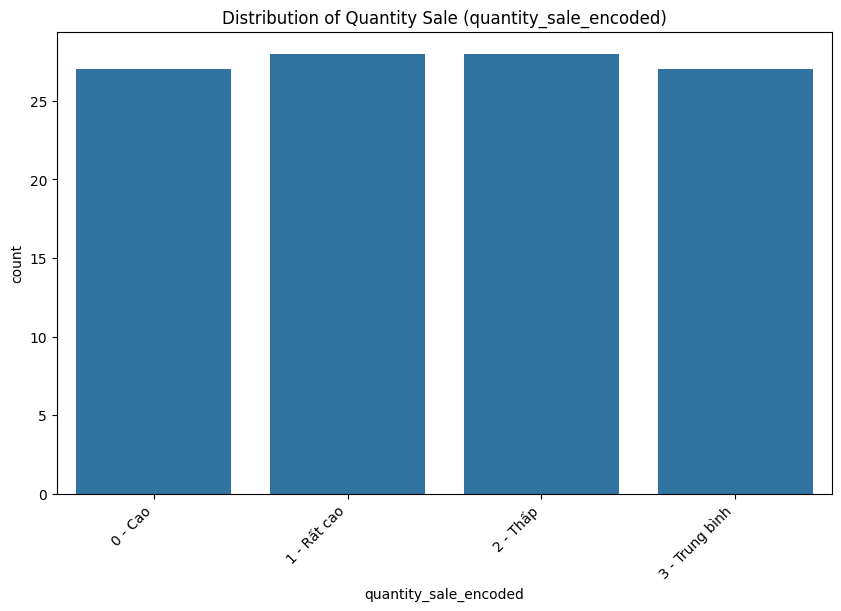

Lượt bán 0 (Cao): 27 sản phẩm
Lượt bán 1 (Rất cao): 28 sản phẩm
Lượt bán 2 (Thấp): 28 sản phẩm
Lượt bán 3 (Trung bình): 27 sản phẩm


In [51]:
#Vẽ biểu đồ cột với rom_type_encoded
plt.figure(figsize=(10, 6))
sns.countplot(x="quantity_sale_encoded", data=df)

plt.title("Distribution of Quantity Sale (quantity_sale_encoded)")

# Tạo nhãn trục x có cả số rom_type_encoded và tên thương hiệu
quantity_codes = sorted(df["quantity_sale_encoded"].unique())
quantity_labels = label_encoder_quantity.inverse_transform(quantity_codes)
combined_labels = [f"{code} - {quantity}" for code, quantity in zip(quantity_codes, quantity_labels)]

# Cập nhật nhãn trục x
plt.xticks(ticks=quantity_codes, labels=combined_labels, rotation=45, ha="right")

# Hiển thị biểu đồ
plt.show()



quantity_counts = df["quantity_sale_encoded"].value_counts().sort_index()
for quantity_code, count in quantity_counts.items():
    print(f"Lượt bán {quantity_code} ({label_encoder_quantity.inverse_transform([quantity_code])[0]}): {count} sản phẩm")

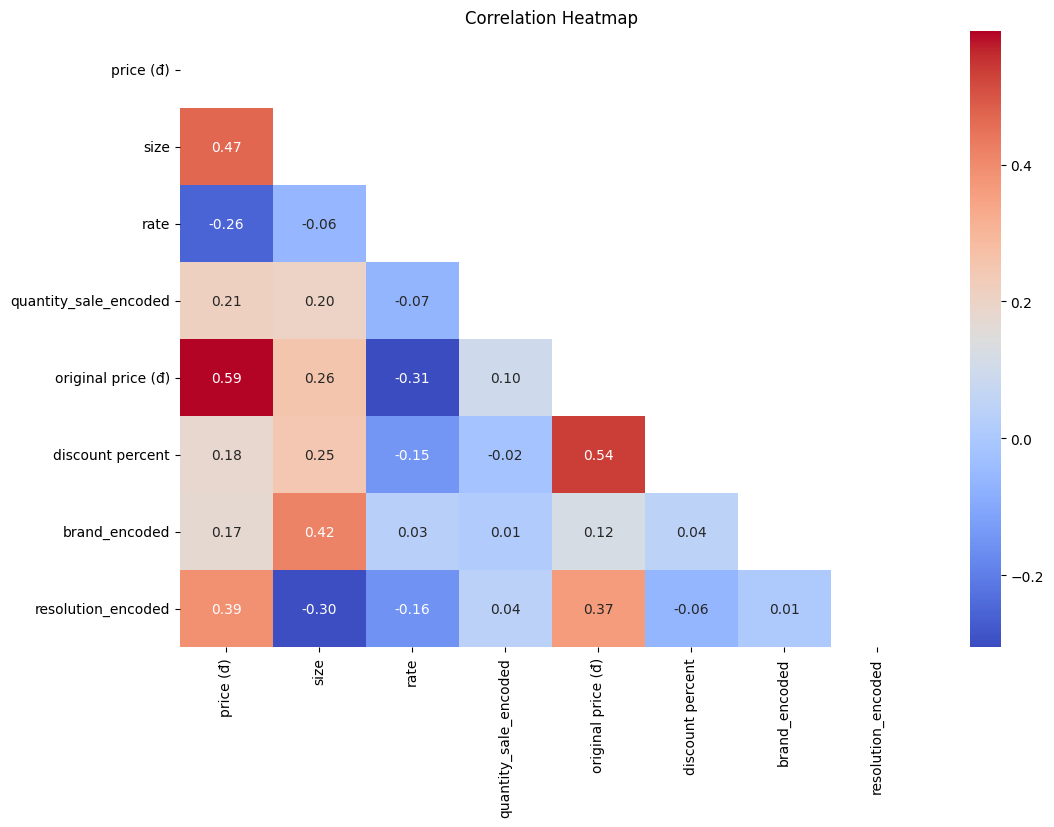

In [53]:

# Compute the correlation matrix
df1 = df[['price (đ)', 'size', 'rate', 'quantity_sale_encoded', 'original price (đ)', 'discount percent', 'brand_encoded', 'resolution_encoded']]
corr_matrix = df1.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=np.triu(corr_matrix))
plt.title('Correlation Heatmap')
plt.show()


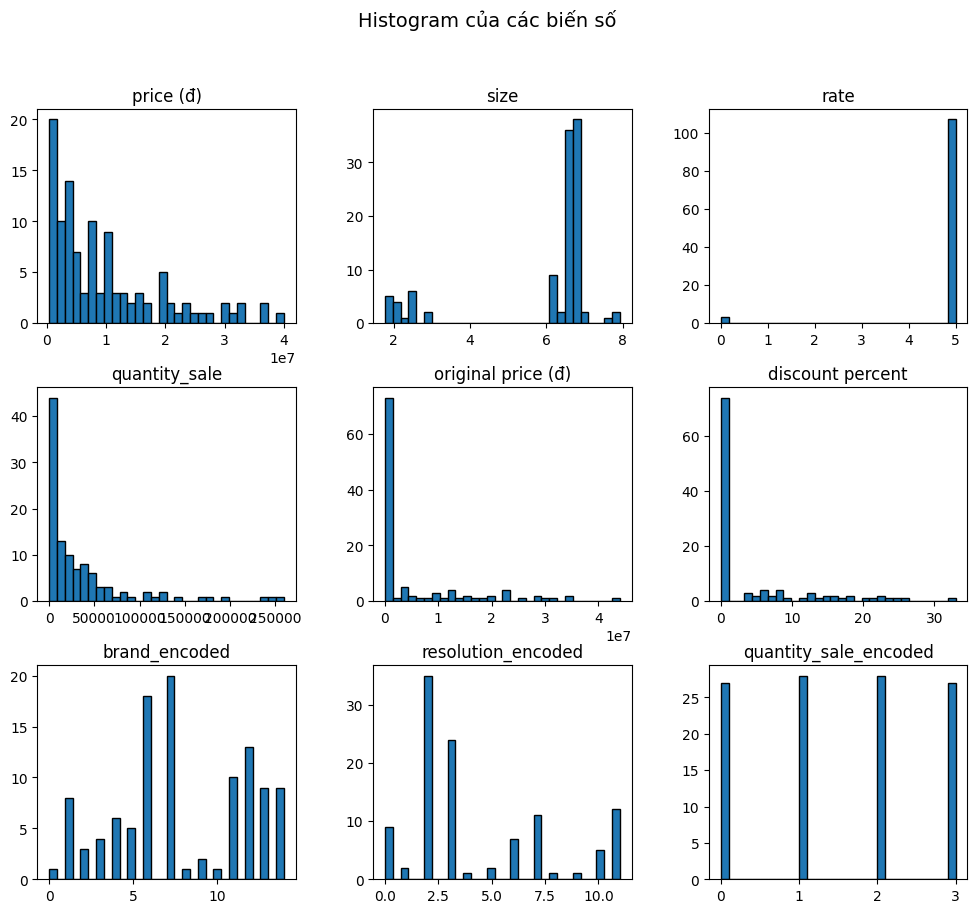

In [54]:
import matplotlib.pyplot as plt

# Kiểm tra nếu df tồn tại trước khi vẽ biểu đồ
if 'df' in locals() or 'df' in globals():
    # Chọn các cột số để vẽ histogram
    numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

    # Vẽ histogram cho từng biến số
    df[numeric_cols].hist(figsize=(12, 10), bins=30, edgecolor='black', grid=False)
    plt.suptitle("Histogram của các biến số", fontsize=14)
    plt.show()
else:
    print("Dữ liệu df chưa được xác định. Vui lòng cung cấp dữ liệu.")


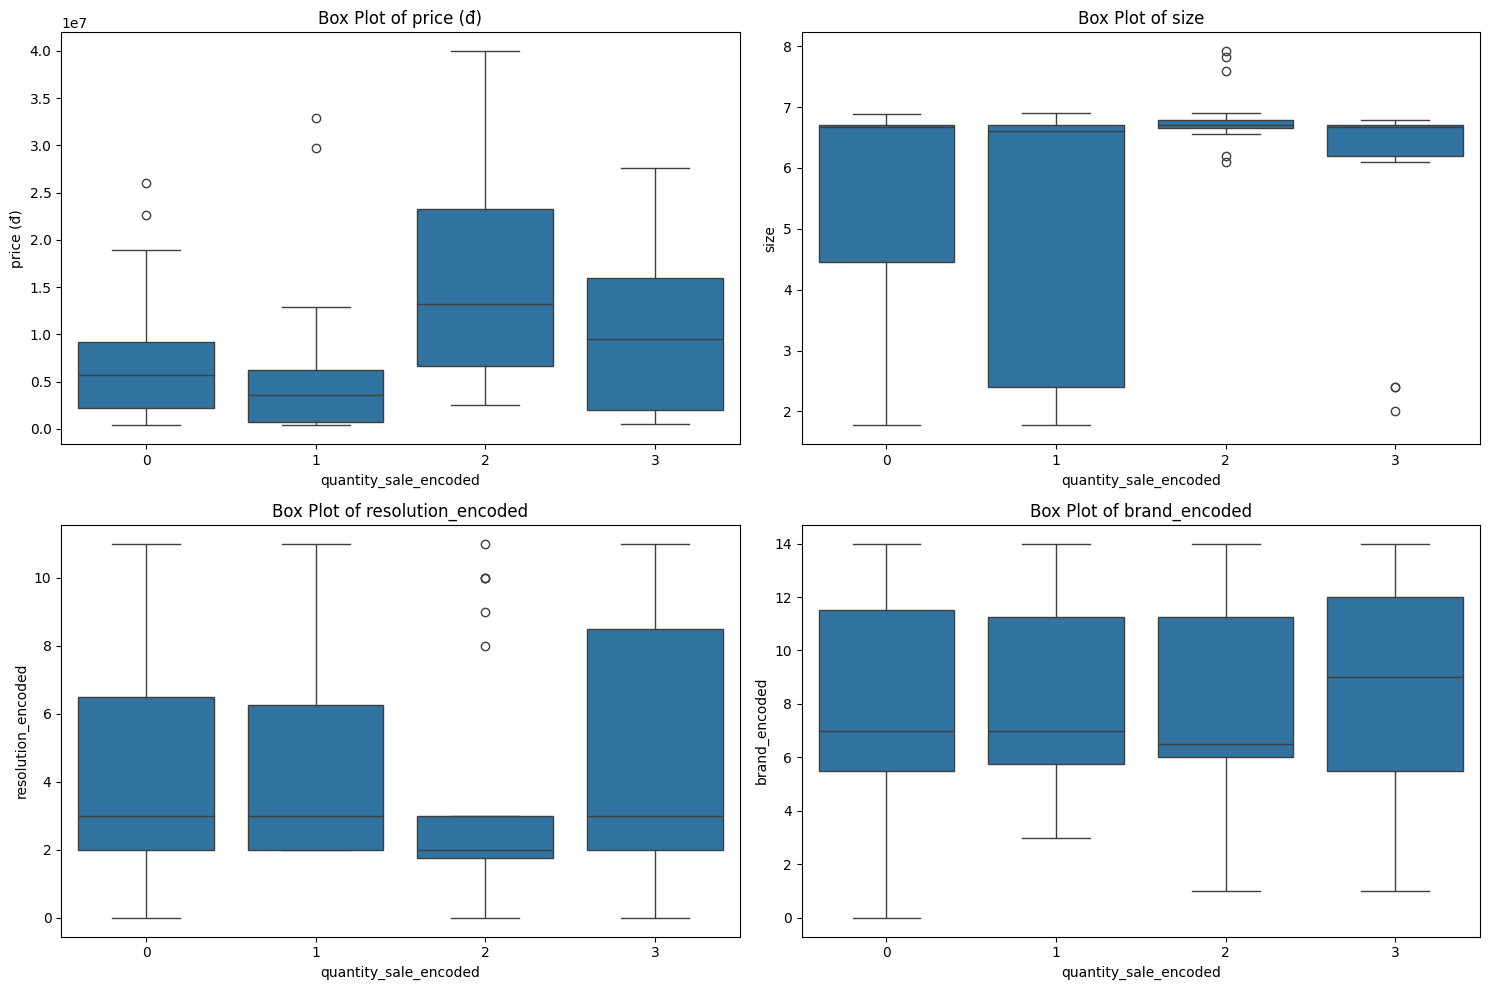

In [56]:

features = [
    'price (đ)', 'size', 'resolution_encoded', 'brand_encoded'
]

# Create box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='quantity_sale_encoded', y=col, data=df)
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()


# Mô hình phân lớp

In [57]:
from sklearn.model_selection import GridSearchCV, train_test_split
# Select the required columns and convert to Pandas
required_columns = [
    'price (đ)', 'size', 'resolution_encoded', 'brand_encoded', 'quantity_sale_encoded'
]
df_pd = df[required_columns]

# Define features and target
X = df_pd.drop(columns=['quantity_sale_encoded'])
y = df_pd['quantity_sale_encoded']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]             # Whether bootstrap samples are used when building trees
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,                          # 5-fold cross-validation
    scoring='accuracy',            # Metric to optimize
    n_jobs=-1,                     # Use all available cores
    verbose=2                      # Verbose output
)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Best parameters and best estimator
print("Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

# Predict and evaluate the model with the best parameters
rf_predictions = best_rf_model.predict(X_test)
print("Optimized Random Forest Model Performance:")
print(classification_report(y_test, rf_predictions))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Optimized Random Forest Model Performance:
              precision    recall  f1-score   support

           0       0.29      0.33      0.31         6
           1       0.67      0.25      0.36         8
           2       0.57      0.67      0.62         6
           3       0.00      0.00      0.00         2

    accuracy                           0.36        22
   macro avg       0.38      0.31      0.32        22
weighted avg       0.48      0.36      0.38        22



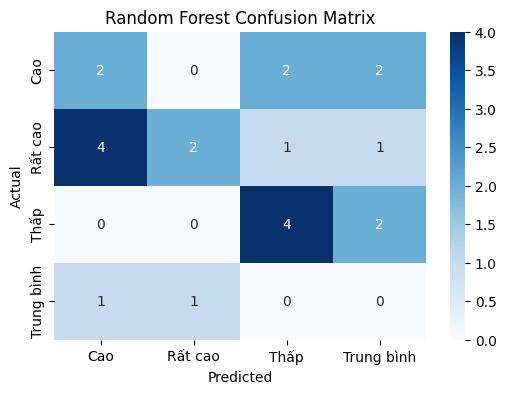

In [59]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, rf_predictions)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Cao", "Rất cao", "Thấp", "Trung bình"], yticklabels=["Cao", "Rất cao", "Thấp", "Trung bình"])
plt.title("Random Forest Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

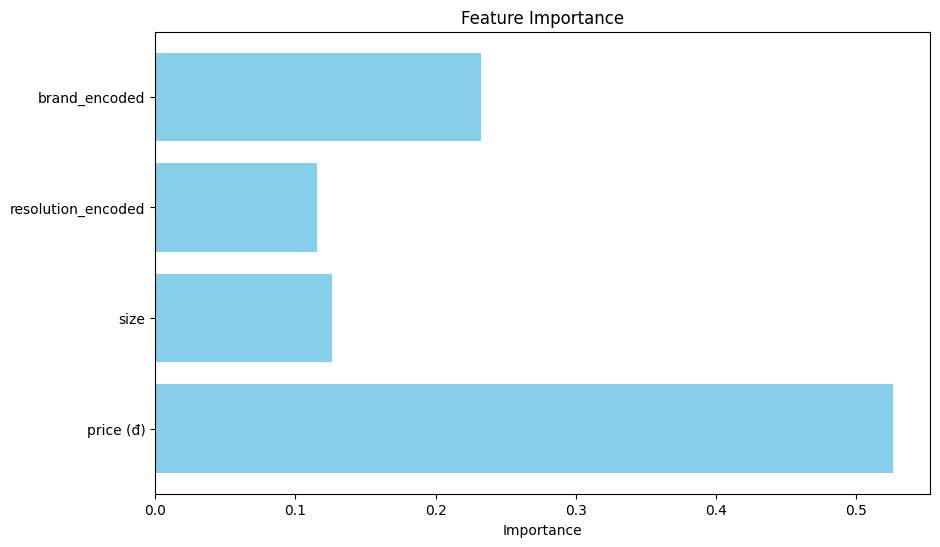

In [60]:

# Get feature importances
importances = best_rf_model.feature_importances_
features = X.columns

# Create a bar chart for feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


In [61]:
from xgboost import XGBClassifier
# Define the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of boosting rounds
    'max_depth': [3, 5, 7],                # Maximum tree depth for base learners
    'learning_rate': [0.01, 0.1, 0.2],     # Step size shrinkage
    'subsample': [0.8, 1.0],               # Subsample ratio of training instances
    'colsample_bytree': [0.8, 1.0],        # Subsample ratio of columns when constructing each tree
    'gamma': [0, 1, 5]                     # Minimum loss reduction to make a further partition
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,                          # 5-fold cross-validation
    scoring='accuracy',            # Metric to optimize
    n_jobs=-1,                     # Use all available cores
    verbose=2                      # Verbose output
)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Best parameters and best estimator
print("Best Parameters:", grid_search.best_params_)
best_xgb_model = grid_search.best_estimator_

# Predict and evaluate the model with the best parameters
xgb_predictions = best_xgb_model.predict(X_test)
print("Optimized XGBoost Model Performance:")
print(classification_report(y_test, xgb_predictions))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Optimized XGBoost Model Performance:
              precision    recall  f1-score   support

           0       0.33      0.50      0.40         6
           1       0.50      0.12      0.20         8
           2       0.43      0.50      0.46         6
           3       0.25      0.50      0.33         2

    accuracy                           0.36        22
   macro avg       0.38      0.41      0.35        22
weighted avg       0.41      0.36      0.34        22



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:45:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


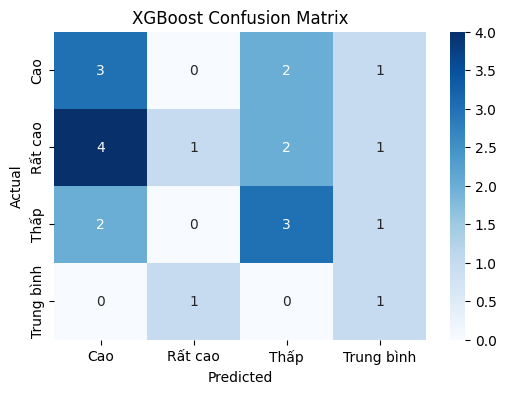

In [62]:

# Generate confusion matrix for XGBoost
xgb_cm = confusion_matrix(y_test, xgb_predictions)

# Plot confusion matrix for XGBoost
plt.figure(figsize=(6, 4))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Cao", "Rất cao", "Thấp", "Trung bình"], yticklabels=["Cao", "Rất cao", "Thấp", "Trung bình"])
plt.title("XGBoost Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

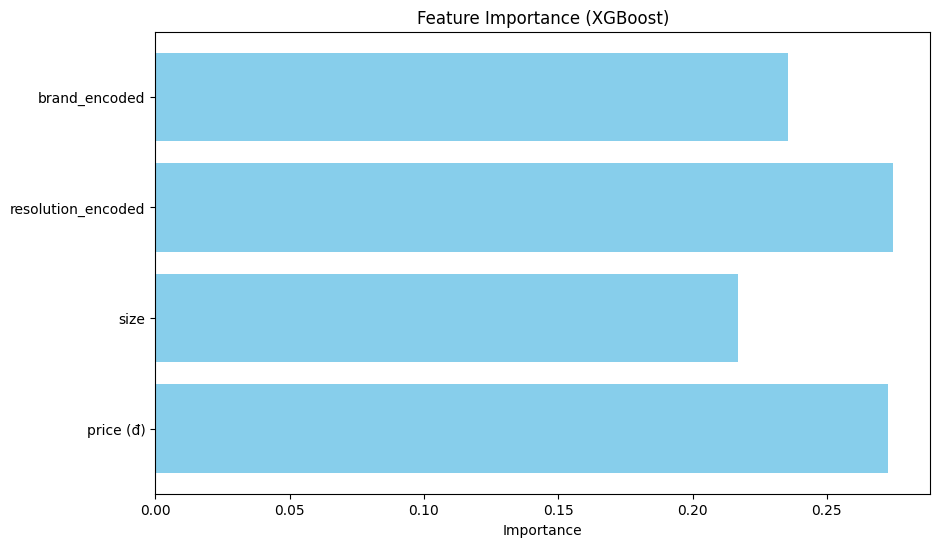

In [63]:

# Get feature importance from XGBoost model
xgb_importances = best_xgb_model.feature_importances_
features = X.columns

# Create a bar chart for feature importance from XGBoost
plt.figure(figsize=(10, 6))
plt.barh(features, xgb_importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance (XGBoost)')
plt.show()

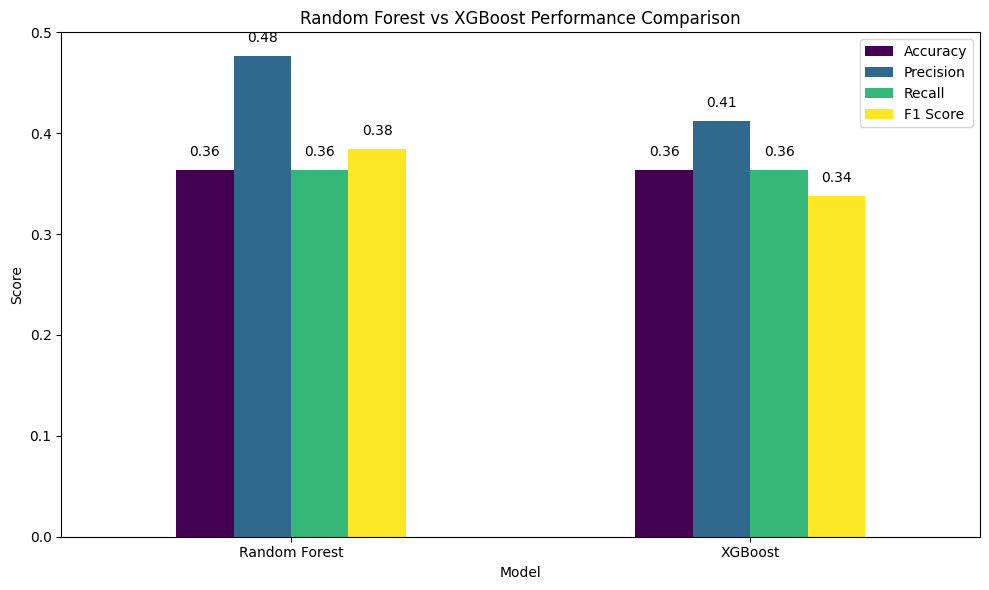

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for XGBoost, specifying 'weighted' average for multiclass
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions, average='weighted') # Specify average='weighted'
xgb_recall = recall_score(y_test, xgb_predictions, average='weighted') # Specify average='weighted'
xgb_f1 = f1_score(y_test, xgb_predictions, average='weighted') # Specify average='weighted'


# Store performance metrics for both models
model_comparison_metrics = {
    'Model': ['Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_score(y_test, rf_predictions), xgb_accuracy],
    'Precision': [precision_score(y_test, rf_predictions, average='weighted'), xgb_precision], # Specify average='weighted'
    'Recall': [recall_score(y_test, rf_predictions, average='weighted'), xgb_recall], # Specify average='weighted'
    'F1 Score': [f1_score(y_test, rf_predictions, average='weighted'), xgb_f1] # Specify average='weighted'
}

# Convert to DataFrame for easier plotting
comparison_df = pd.DataFrame(model_comparison_metrics)

# Plot model comparison
ax = comparison_df.set_index('Model').plot(kind='bar', figsize=(10, 6), colormap='viridis')

# Add metric values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 8),  # 8 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Random Forest vs XGBoost Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()